In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from manim import * 
import os

c:\Users\matth\OneDrive - University of Waterloo\Documents\Python Files\Environments\home_VENV\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
#Loading cleaned dataset
main_dataset_cleaned_filepath = "FIFA_data_cleaned.xlsx"

FIFA_cleaned_DF = pd.read_excel(main_dataset_cleaned_filepath)

In [3]:
#Initializing variables
option6_dataset_filepath = "FIFA_data_option6.xlsx"
FIFA_edition_option6 = 21
cat_var_option6 = "team_jersey_number"
cont_var_option6 = "wage_eur"
cat_var_range_option6 = range(1,12)
cont_var_range_option6 = [0,16000,2000]

#Load the dataset if it already exists
if os.path.exists(option6_dataset_filepath):
    FIFA_option6_DF = pd.read_excel(option6_dataset_filepath)
#Create the dataset if it does not exist
else:
    #Filter the datased based on the FIFA edition and selected variables
    FIFA_filtered_DF = FIFA_cleaned_DF[FIFA_cleaned_DF['fifa_edition'] == FIFA_edition_option6]
    FIFA_filtered_DF = FIFA_filtered_DF[[cat_var_option6,cont_var_option6]]
    #Filter the dataset based on the selected range of values for the categorical variable
    FIFA_filtered_DF = FIFA_filtered_DF[FIFA_filtered_DF[cat_var_option6].isin(cat_var_range_option6)]
    #Group the dataset based on the categorical variable and calculate the mean of the continuous variable
    FIFA_option6_DF = FIFA_filtered_DF.groupby(cat_var_option6)[cont_var_option6].mean().reset_index()
    #Rename the columns to match the desired output
    FIFA_option6_DF = FIFA_option6_DF.rename(columns={'team_jersey_number': 'Jersey Number','wage_eur': 'Average Market Value (€)'})
    #Save the dataset to an Excel file
    FIFA_option6_DF.to_excel(option6_dataset_filepath,index=False)

Manim Community v0.19.0

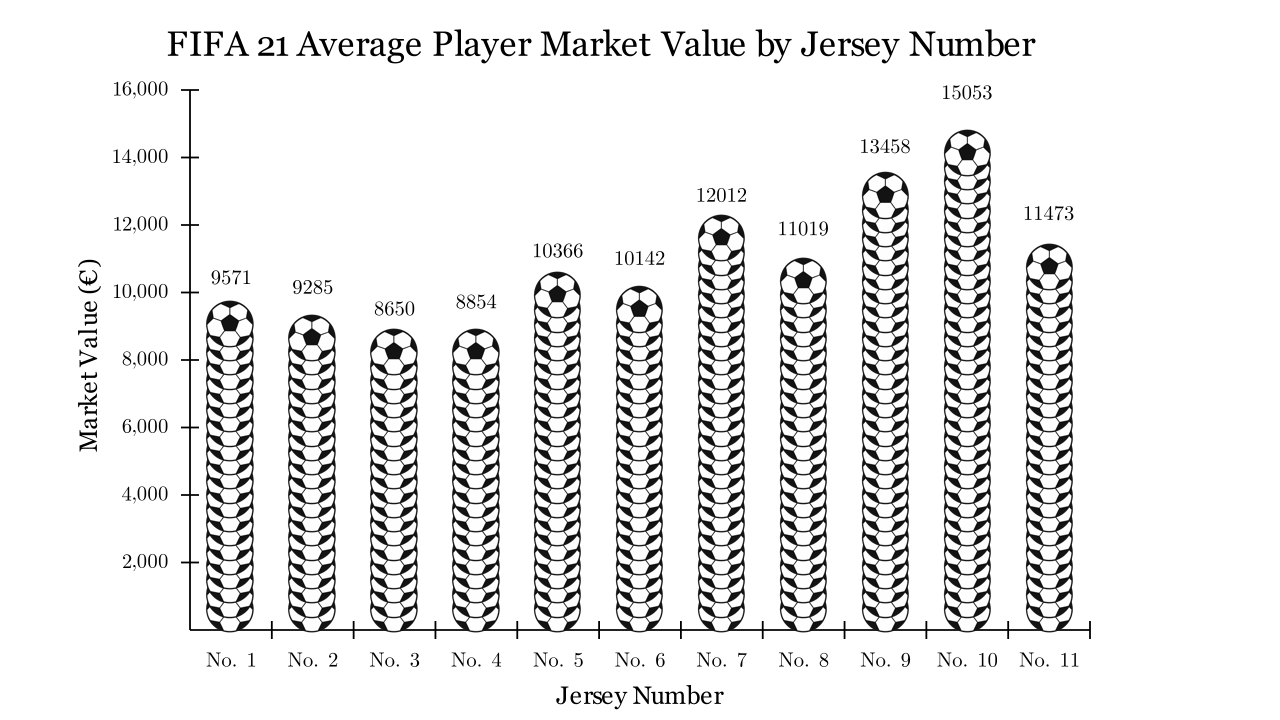

In [ ]:
#Define the FIFA Bar Chart class
class FIFABarChart(Scene):
    #Create the bar chart with the specified values and labels
    def construct(self):
        #Create the bar chart
        fifa_BAR_CHART = BarChart(
            values=FIFA_option6_DF["Average Market Value (€)"].astype(int),
            bar_names=[f"No. {int(i)}" for i in FIFA_option6_DF["Jersey Number"]],
            y_range=cont_var_range_option6,
            y_length=6,
            x_length=10,
            bar_width=0.5,
            x_axis_config={"font_size": 22, "color": BLACK},
            y_axis_config={"font_size": 22, "color": BLACK},
        )
        
        #Get the bar labels and set the axes color
        bar_labels = fifa_BAR_CHART.get_bar_labels(font_size=22,color=BLACK)
        fifa_BAR_CHART.axes.set_color(BLACK)
        
        #Set the title
        title = Text("FIFA 21 Average Player Market Value by Jersey Number",font_size=28,color=BLACK)
        title.next_to(fifa_BAR_CHART,UP,buff=0.2)

        #Set the x axis labels
        x_axis_label = Text("Jersey Number",font_size=20,color=BLACK)
        x_axis_label.next_to(fifa_BAR_CHART.x_axis,DOWN,buff=0.2)

        #Set the y axis labels
        y_axis_label = Text("Market Value (€)",font_size=20,color=BLACK)
        y_axis_label.next_to(fifa_BAR_CHART.y_axis,LEFT,buff=0.2)
        y_axis_label.rotate(PI/2)
        y_axis_label.shift(RIGHT*1)

        #Add the bar chart
        self.add(fifa_BAR_CHART, title, bar_labels, x_axis_label, y_axis_label)

        #Make the bars invisible
        for bar in fifa_BAR_CHART.bars:
            bar.set_opacity(0)
        
        #Get the y range of the bar chart
        y_min = fifa_BAR_CHART.y_range[0]
        y_max = fifa_BAR_CHART.y_range[1]

        #Get the bar width
        bar_width = fifa_BAR_CHART.bar_width
        #Adding multiple soccer balls above each bar
        for i, value in enumerate(FIFA_option6_DF["Average Market Value (€)"].astype(int)):                    
            #Calculate the height of the bar and the number of balls to be create
            num_balls_multiplier = 3
            height_factor = 5.7
            bar_height = (value - y_min)/(y_max - y_min)*fifa_BAR_CHART.y_length            
            ball_width = bar_width/height_factor
            ball_height = bar_width - 0.025
            num_balls = num_balls_multiplier*bar_height/bar_width
            int_num_balls = int(np.floor(num_balls))

            #Define the x and y offsets for better positioning
            ball_x_offset = i/1.098 - 4.55
            ball_y_offset = -2.775
            
            # num_balls_multiplier = 3
            # height_factor = 2.5
            # bar_height = (value - y_min)/(y_max - y_min)*fifa_BAR_CHART.y_length            
            # ball_width = bar_width/height_factor
            # ball_height = bar_width - 0.025
            # num_balls = num_balls_multiplier*bar_height/bar_width
            # int_num_balls = int(np.floor(num_balls))

            # #Define the x and y offsets for better positioning
            # ball_x_offset = i/1.098 - 4.55
            # ball_y_offset = -2.775

            #Create the balls for each bar
            for j in range(int_num_balls):
                ball = ImageMobject("www/soccerball.png")  
                ball.scale(ball_width)
                #Position each ball vertically
                ball.move_to(np.array([ball_x_offset,ball_y_offset + j*ball_height/num_balls_multiplier,0]))
                #Add the ball to the chart
                self.add(ball)

        #Set background color to white
        self.camera.background_color = "#FFFFFF"

#Command to render the animation
%manim -qm -v WARNING FIFABarChart